<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/Ayush-Dixit-Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
Mean Squared Error: 54.31
R-squared Score: nan

Model Coefficients:
TV: 0.1027
Radio: 0.0723
Newspaper: 0.0026


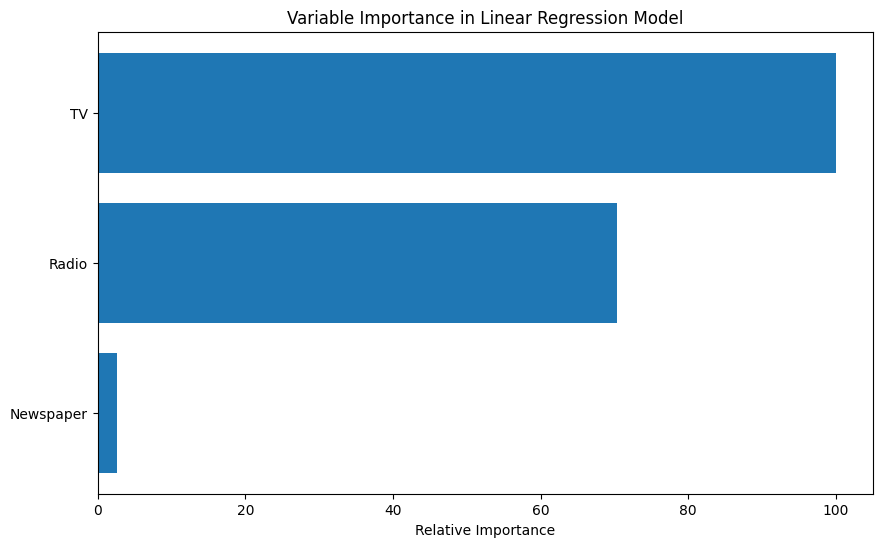


Predictions:
Actual: 10.20, Predicted: 2.83


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
from sklearn.exceptions import UndefinedMetricWarning

data = {
    'TV': [230, 37, 151, 180],
    'Radio': [37, 45, 41, 10],
    'Newspaper': [69, 58, 40, 64],
    'Sales': [22.1, 10.2, 14.2, 15.0]
}
df = pd.DataFrame(data)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


plt.figure(figsize=(10, 6))
feature_importance = abs(model.coef_)
feature_importance = 100 * (feature_importance / np.max(feature_importance))
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance in Linear Regression Model')
plt.show()

print("\nPredictions:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")